# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [37]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [38]:
import numpy as np
def design_matrix(x, y, m):
    A = np.ones((len(x), m+1))
    for i in range(len(x)):
        for j in range(1, m+1):
            A[i, j] = x[i]**j
    A_trans = A.T
    a = np.linalg.solve(A_trans @ A, A_trans @ y) 
    Pm = lambda x: sum(a[k]*x**k for k in range(m+1)) 
    return Pm

следующий кусок я сделала шоб було

<IPython.core.display.Javascript object>


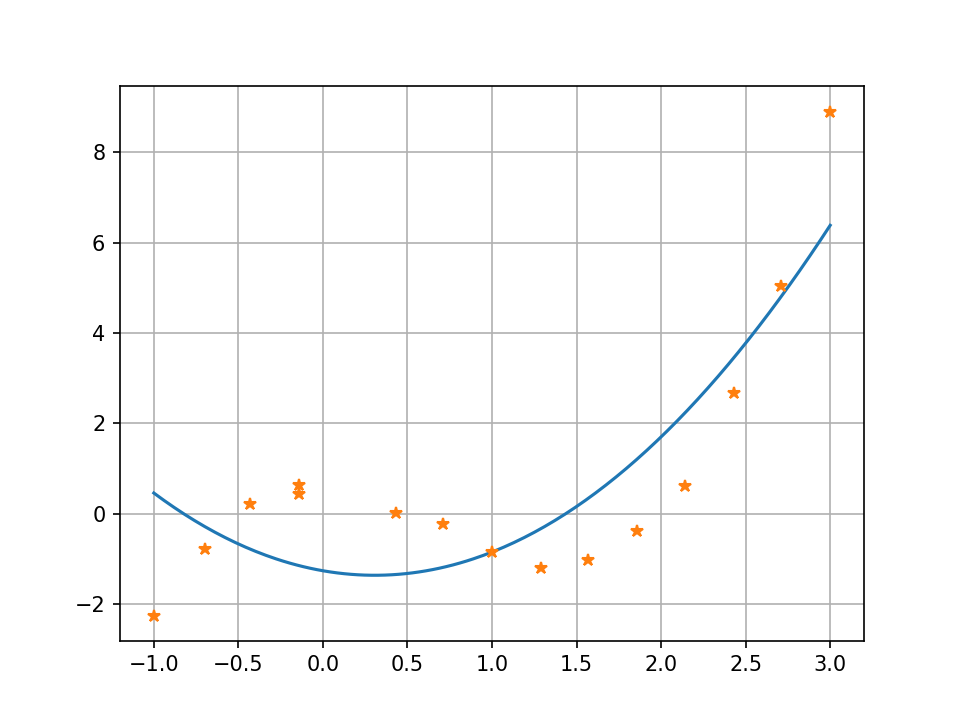

In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
Pm = design_matrix(x, y, 2)
x_new = np.linspace(-1, 3, 200)
y_new = Pm(x_new)
plt.figure('График 1')
plt.plot(x_new, y_new)
plt.plot(x, y, '*')
plt.grid()
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

Оптимальное m = 4


<IPython.core.display.Javascript object>


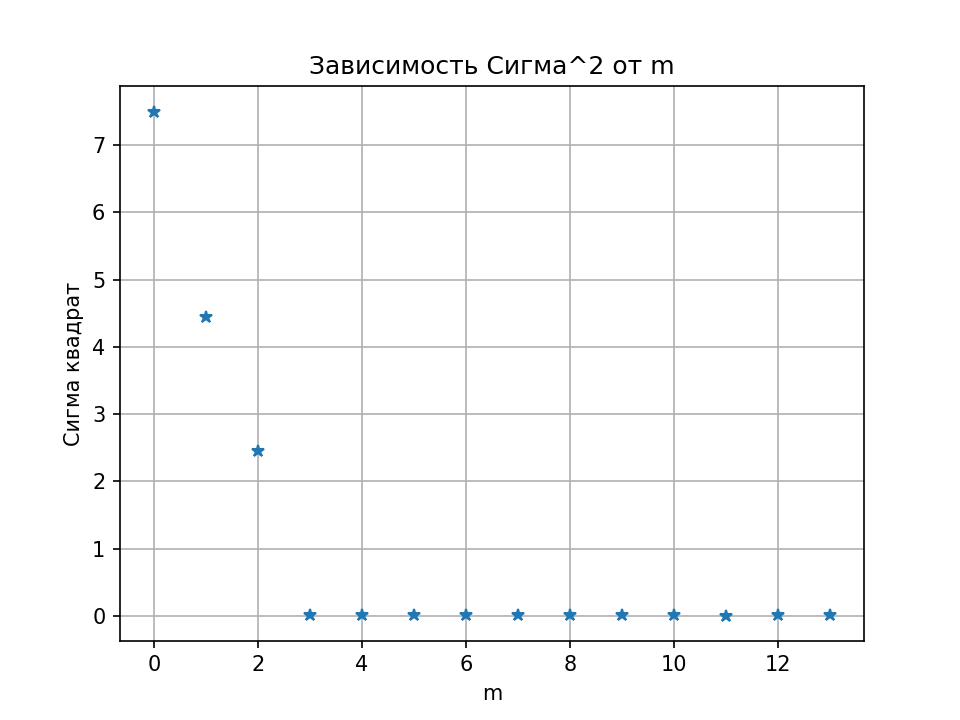

In [40]:
n = len(x)
m = 13
sigma_m = np.zeros(m+1)
for i in range(m+1):
    Pm = design_matrix(x, y, i)
    sigma_m[i] =  sum((Pm(x[k])-y[k])**2 for k in range(n)) / (n - i)

i = 0
while sigma_m[i] > sigma_m[i+1] and i < m:
    i = i + 1
    
ind = i    
print('Оптимальное m =', ind)
plt.figure('График 2')
plt.plot(sigma_m, '*')
plt.xlabel('m')
plt.ylabel('Сигма квадрат')
plt.title('Зависимость Сигма^2 от m')
plt.grid()
plt.show()

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

<IPython.core.display.Javascript object>


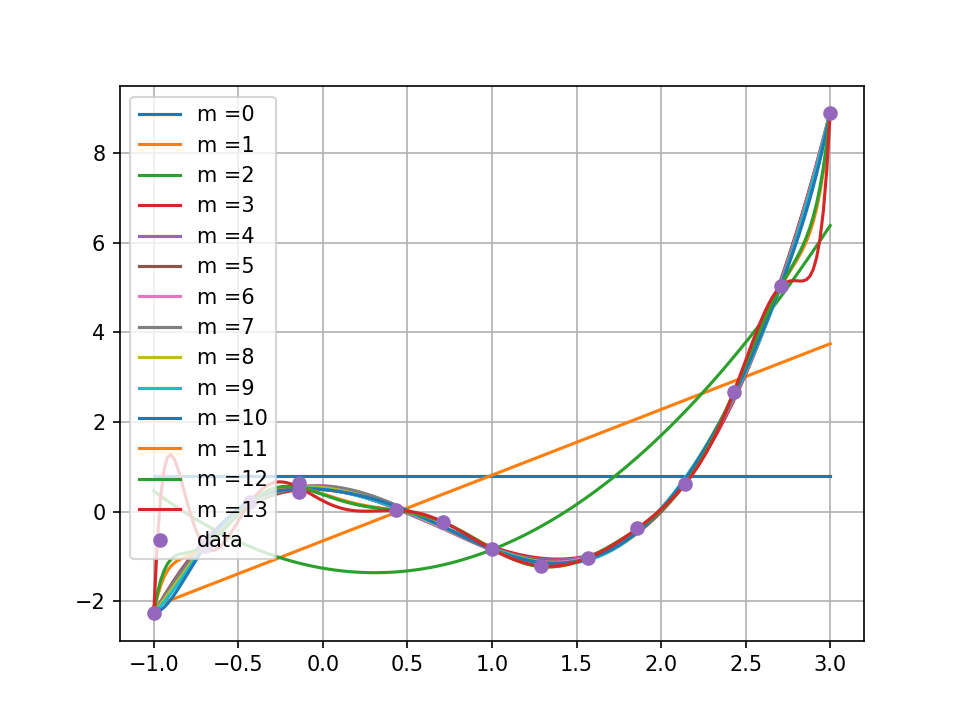

<IPython.core.display.Javascript object>


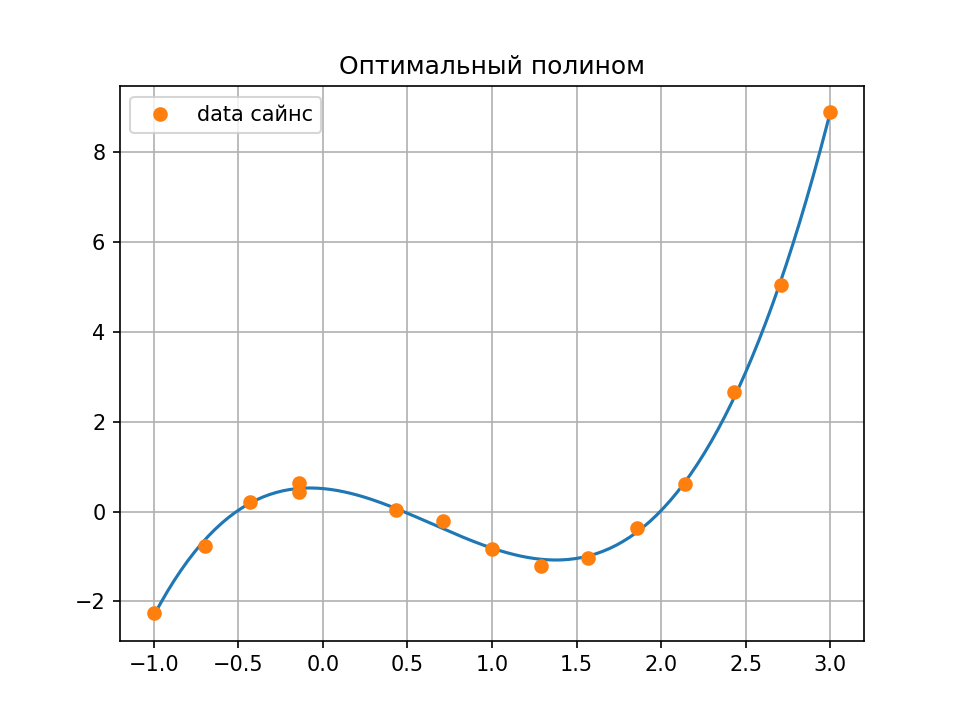

In [41]:
plt.figure('График III')
for i in range(m+1):
    Pm = design_matrix(x, y, i)
    x_new = np.linspace(-1, 3, 200)
    y_new = Pm(x_new)
    plt.plot(x_new, y_new, label = 'm =' + str(i))
plt.plot(x, y, 'o', label='data')
plt.legend()
plt.grid()

Pm = design_matrix(x, y, 4)
x_new_4 = np.linspace(-1, 3, 200)
y_new_4 = Pm(x_new_4)
plt.figure('График 4')
plt.plot(x_new_4, y_new_4)
plt.plot(x, y, 'o', label='data сайнс')
plt.grid()
plt.title('Оптимальный полином')
plt.legend()
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

<IPython.core.display.Javascript object>


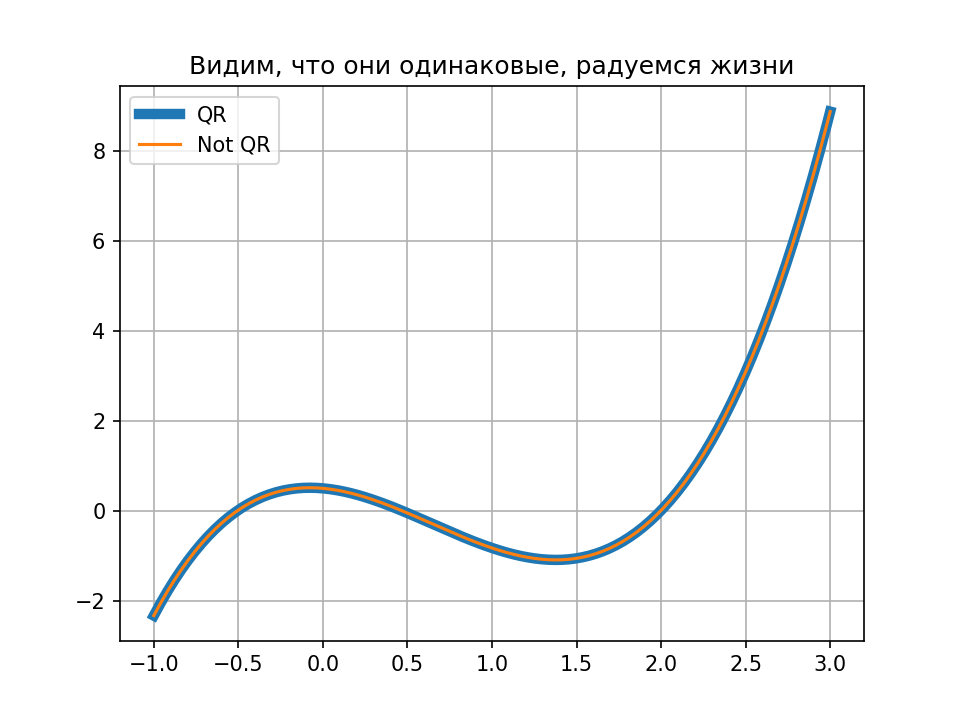

In [42]:

A = np.ones((len(x), ind+1))
for i in range(len(x)):
    for j in range(1, ind+1):
        A[i, j] = x[i]**j
Q, R = np.linalg.qr(A)
Q_trans = Q.T
vek = Q_trans @ y
f = []
R1 = np.zeros((ind+1, ind+1)) 
for i in range(ind+1):
    f.append(vek[i])
for i in range(ind+1):
    for j in range(ind+1):
        R1[i, j] = R[i, j]
beta = np.linalg.solve(R1, f)
Polinom = lambda x: sum(beta[k]*x**k for k in range(ind+1)) 
plt.figure('График 5')
plt.plot(x_new_4, Polinom(x_new_4), '-', lw = 5, label = 'QR')
plt.plot(x_new_4, y_new_4, label = 'Not QR')
plt.title('Видим, что они одинаковые, радуемся жизни')
plt.legend()
plt.grid()
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [43]:
def lag_inter_pol(x, y, x_tochka):
    m = len(x) - 1 
    l = np.ones(m+1)
    for k in range(m+1):
        for j in range(m+1):
            if j != k:
                l[k] = l[k] * (x_tochka - x[j]) / (x[k] - x[j])
    f_drugoe = sum(y[i] * l[i] for i in range(m+1))
    return f_drugoe

<IPython.core.display.Javascript object>


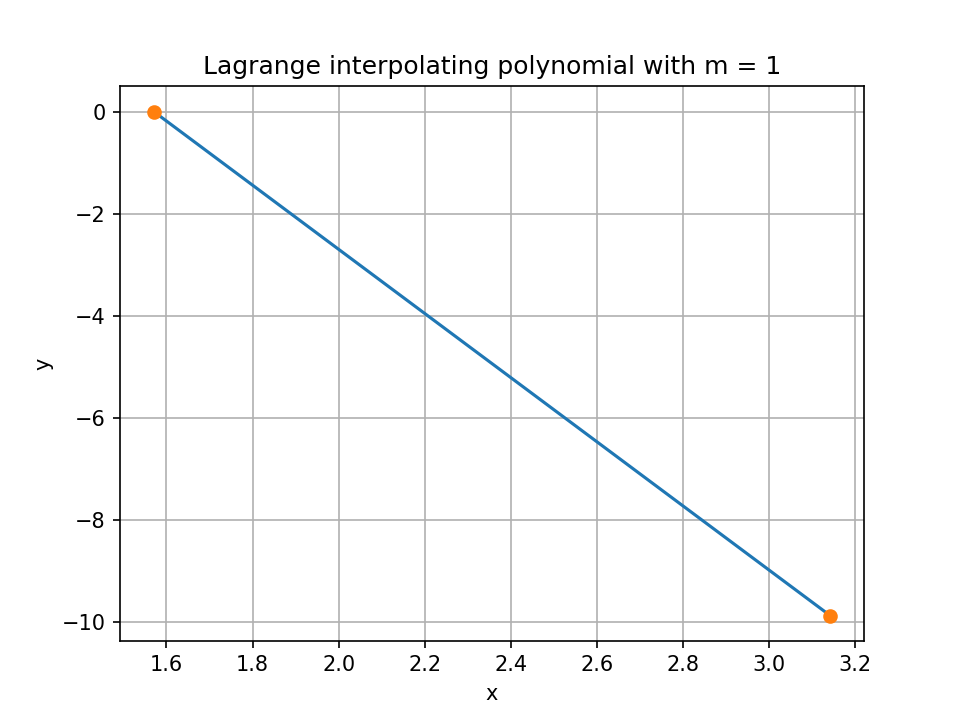

<IPython.core.display.Javascript object>


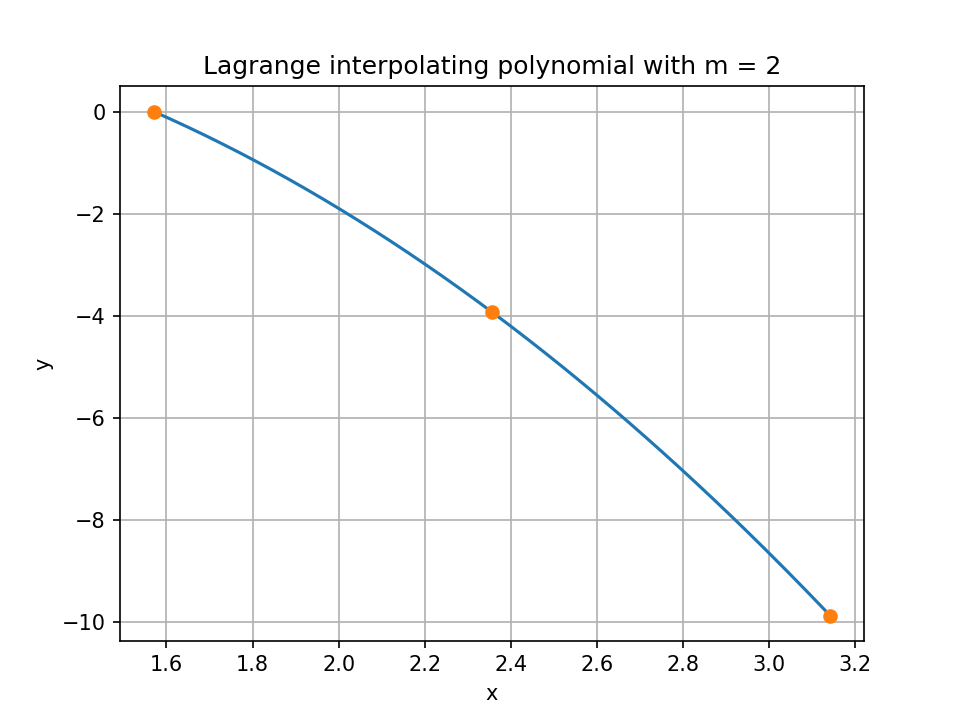

<IPython.core.display.Javascript object>


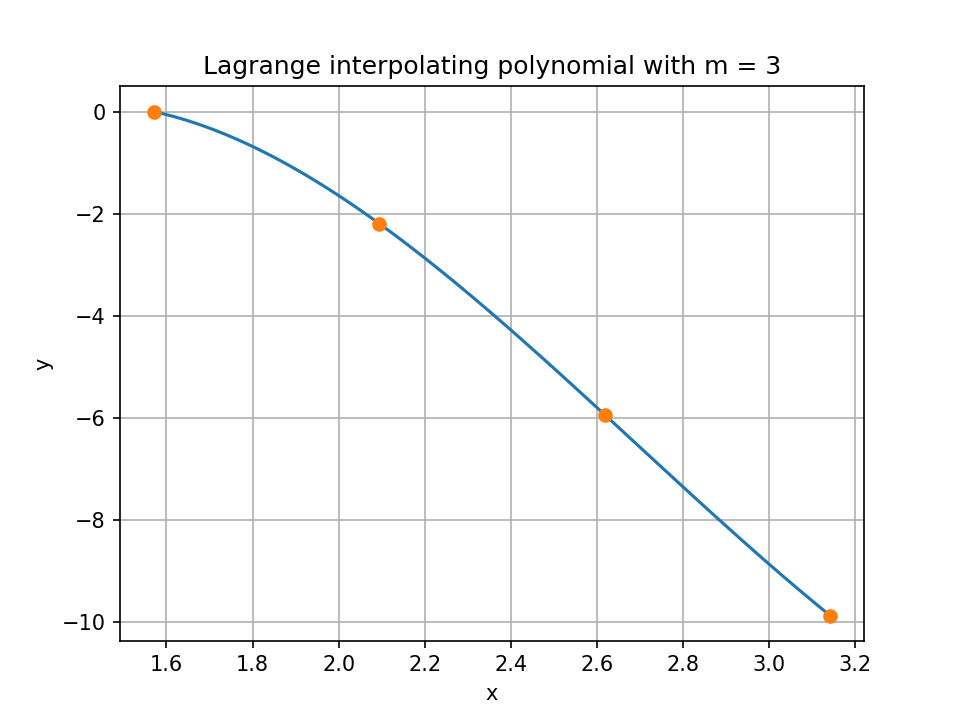

<IPython.core.display.Javascript object>


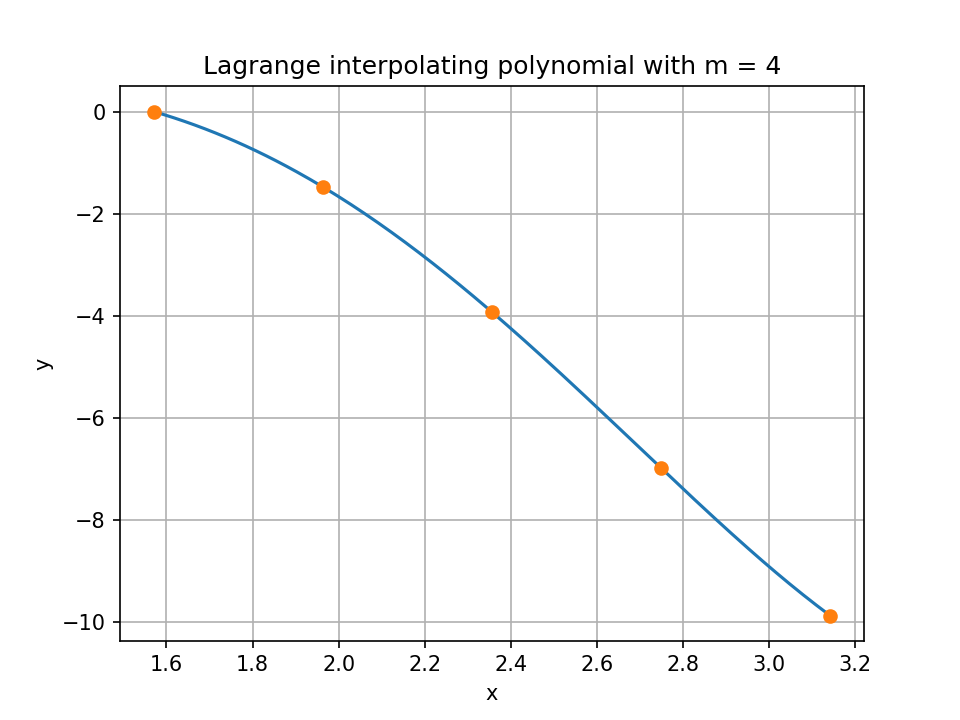

<IPython.core.display.Javascript object>


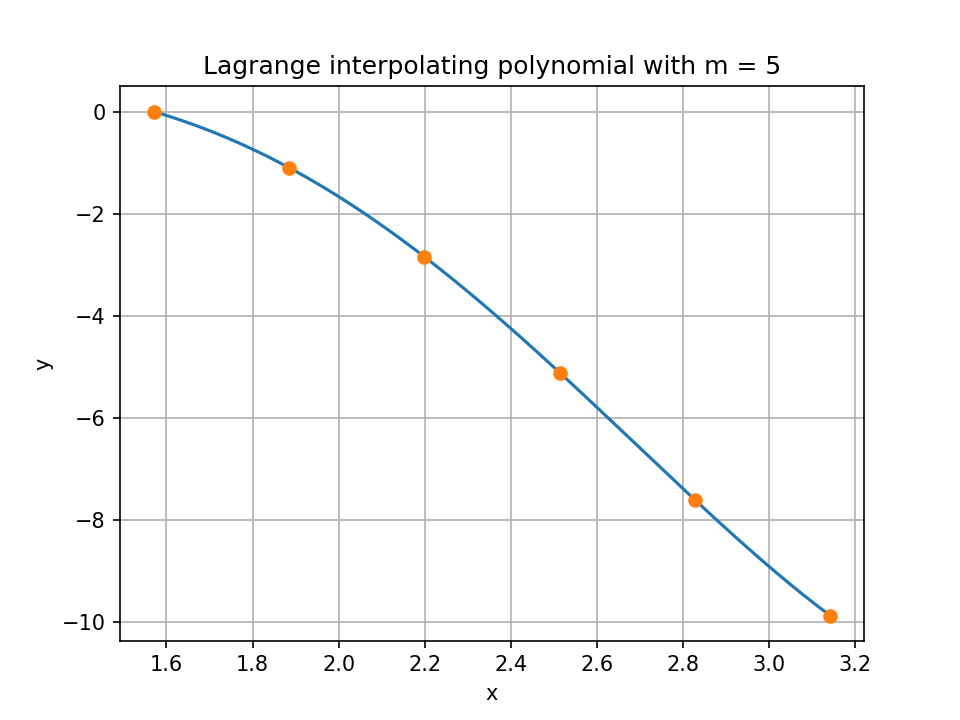

In [44]:
for m in range(1, 6):
    x = np.linspace(np.pi/2, np.pi, m+1)
    y = x**2 * np.cos(x)
    massiv_x = np.linspace(np.pi/2, np.pi, 200)
    massiv_y = np.zeros(len(massiv_x))
    for i in range(200):
        massiv_y[i] = lag_inter_pol(x, y, massiv_x[i])
    plt.figure('График ' + str(m+5))
    plt.plot(massiv_x, massiv_y)
    plt.plot(x, y, 'o')
    plt.title('Lagrange interpolating polynomial with m = ' + str(m))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

Очень я довольна и счастлива, что так вот всё красиво и хорошо.

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

<IPython.core.display.Javascript object>


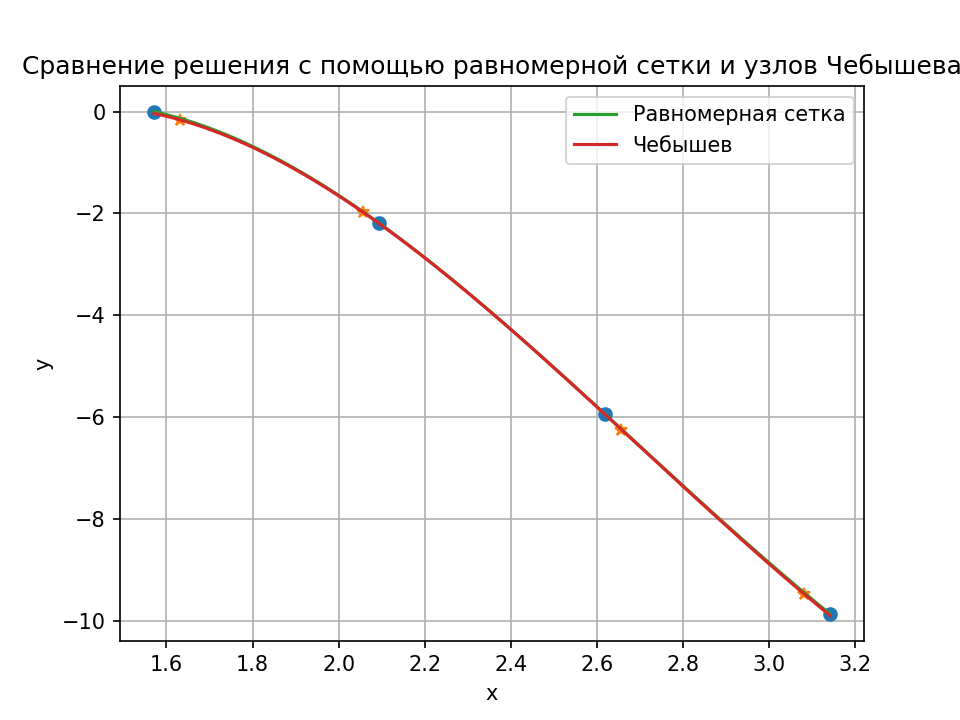

In [45]:
m = 3
x = np.linspace(np.pi/2, np.pi, m+1)
y = x**2 * np.cos(x)
k = np.arange(1, m + 2)
x_uzhe_est = 0.75* np.pi  + 0.25*np.pi*np.cos((2*k - 1)/(2*m + 2)* np.pi)
y_uzhe_est = x_uzhe_est**2 * np.cos(x_uzhe_est)

massiv_x_uzhe_est = np.linspace(np.pi/2, np.pi, 200)
massiv_y_uzhe_est = np.zeros(len(massiv_x_uzhe_est))
for i in range(200):
    massiv_y_uzhe_est[i] = lag_inter_pol(x_uzhe_est, y_uzhe_est, massiv_x_uzhe_est[i])
    
massiv_x = np.linspace(np.pi/2, np.pi, 200)
massiv_y = np.zeros(len(massiv_x))
for i in range(200):
    massiv_y[i] = lag_inter_pol(x, y, massiv_x[i])

plt.figure('График 11')
plt.plot(x, y, 'o')
plt.plot(x_uzhe_est, y_uzhe_est, '*')
plt.grid()

plt.plot(massiv_x, massiv_y,  label = 'Равномерная сетка')
plt.plot(massiv_x_uzhe_est, massiv_y_uzhe_est, label = 'Чебышев')
plt.title('Сравнение решения с помощью равномерной сетки и узлов Чебышева')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Всем спасибо, все свободны :)